In [1]:
import pandas as pd
import numpy as np
import os

Обзоры на приложения в Google Play Store
https://www.kaggle.com/gauthamp10/google-playstore-apps 
Подготовьте список самых популярных приложений по категориям
Какие приложения самые дорогие (и категории)
Какие категории содержат самое большое количество приложений без отзывов

In [2]:
df = pd.read_csv('archive.zip')

In [3]:
df.Price[df.Price > 0.0]

273        1.99
296        4.99
417        0.99
554        2.99
618        0.99
           ... 
2312658    1.99
2312686    1.49
2312703    7.99
2312803    0.99
2312927    2.49
Name: Price, Length: 44933, dtype: float64

In [4]:
df.shape

(2312944, 24)

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [6]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [7]:
print("Количстево категорий ", df.Category.unique().shape[0])
print("Количстево приложений ", df['App Id'].unique().shape[0])

Количстево категорий  48
Количстево приложений  2312944


In [8]:
# удаляем дубликаты если есть
df.drop_duplicates(inplace=True)

In [9]:
# где и сколько nan 
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [140]:
#Объедение двух столбцов 
df['App/Category'] = df['App Name'].str.cat(df['Category'], sep =" / ")

In [141]:
df_Cat_id = df.groupby(['Category'])['Maximum Installs'].transform(max) == df['Maximum Installs']

In [293]:
df_res = df[df_Cat_id][['App/Category', 'Maximum Installs']].sort_values(by=['Maximum Installs'], ascending = True)
df_res

,App/Category,Maximum Installs
396670,"Ticketmaster－Buy, Sell Tickets to Concerts, Sp...",14691214
869940,1mg - Online Medical Store & Healthcare App / ...,18243473
1968155,شرطة الأطفال - مكالمة وهمية / Parenting,36058501
2210988,Perfect365: One-Tap Makeover / Beauty,53849836
2105180,HTC Service Pack / Libraries & Demo,76374212
1158815,WEBTOON / Comics,85170436
2238371,Coin Dozer: Sweepstakes / Casino,95406186
2232616,Universal TV Remote Control / House & Home,96444714
1833142,Words of Wonders: Crossword to Connect Vocabul...,110758785
771773,Solitaire / Card,129283628


### Список самых популярных приложений по категориям


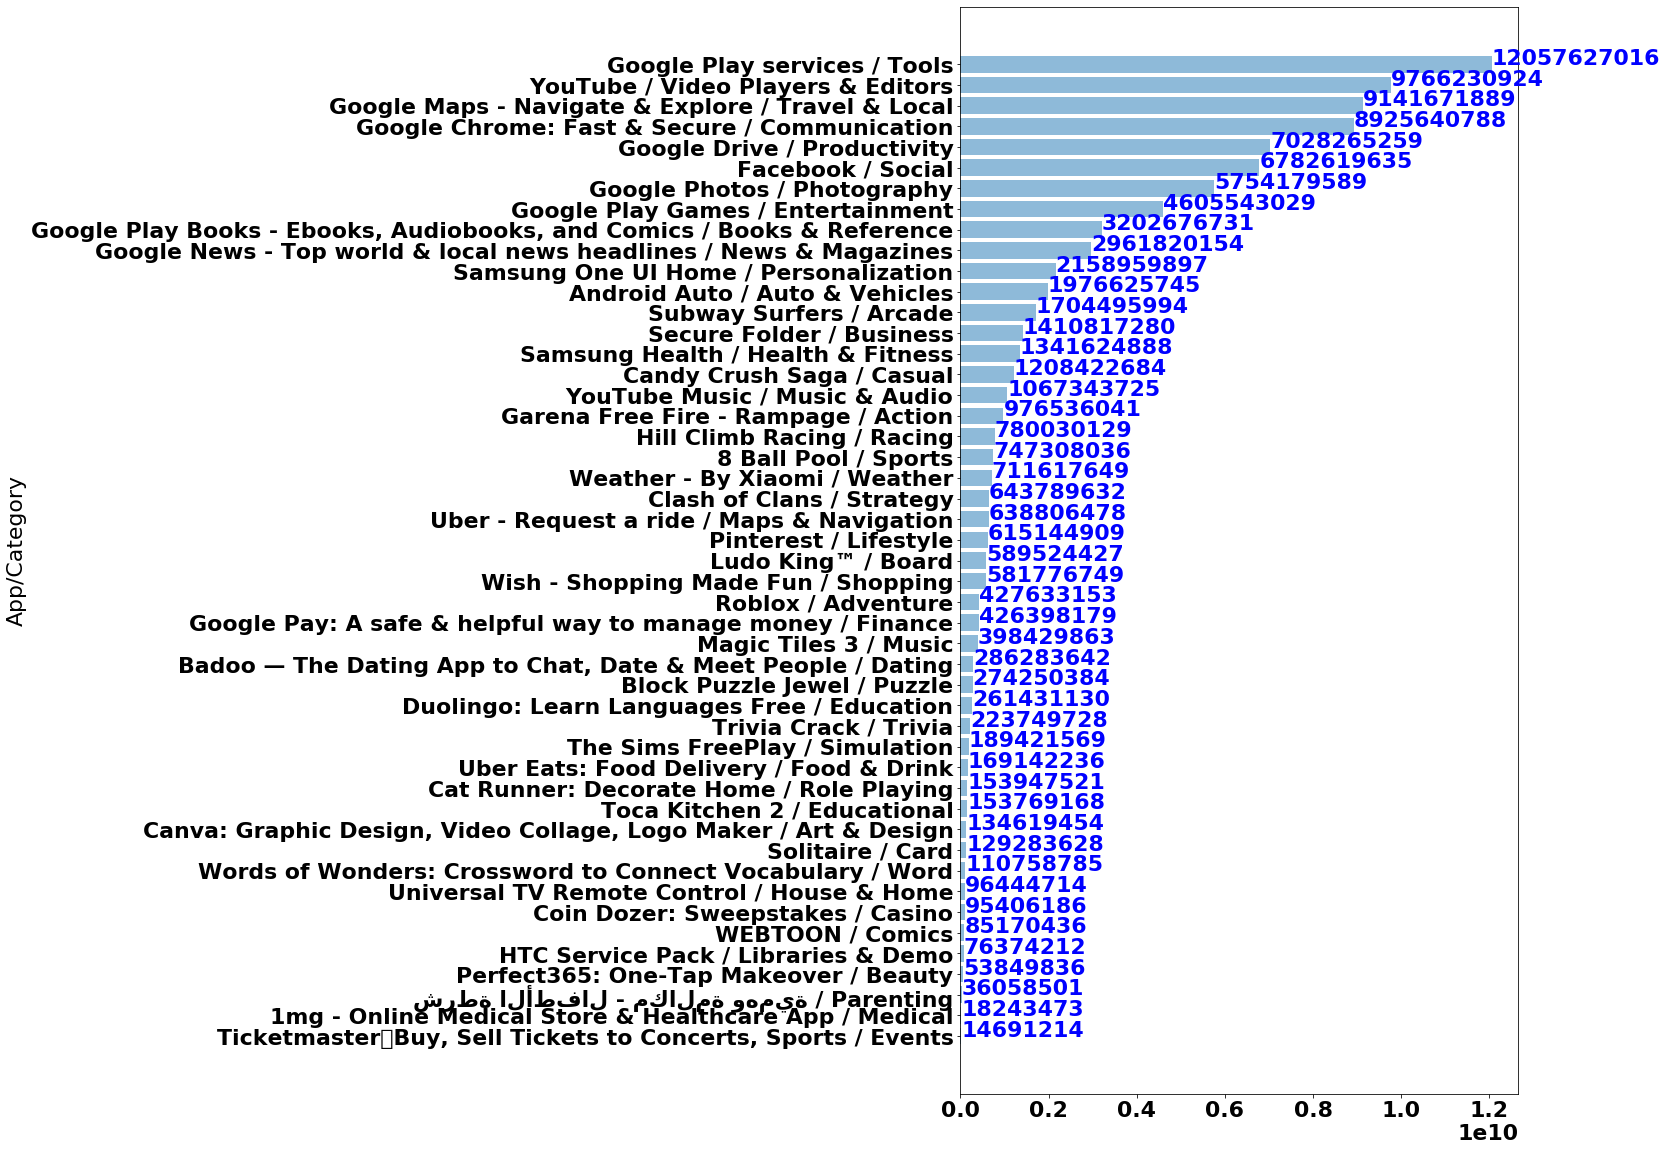

In [291]:
fig, ax = plt.subplots(figsize=(10,20))

ax.barh(df_res['App/Category'],
        df_res['Maximum Installs'], alpha=0.5)
#fig.set_figwidth(15)    #  ширина Figure
#fig.set_figheight(20)    #  высота Figure
#plt.yticks(fontsize=15)
#ax.set_yticklabels(fontsize = 5)
plt.subplots_adjust(wspace=0, hspace=0)
ax.set(ylabel = 'App/Category')

for i, v in enumerate(df_res['Maximum Installs']):
    ax.text(v + 300, i , str(v), color='blue', fontweight='bold')

In [112]:
df[df_Cat_id][['App Name', 'Category']].sort_values(by=['Category'])

,App Name,Category
244319,Garena Free Fire - Rampage,Action
578422,Roblox,Adventure
787700,Subway Surfers,Arcade
1921617,"Canva: Graphic Design, Video Collage, Logo Maker",Art & Design
1628043,Android Auto,Auto & Vehicles
2210988,Perfect365: One-Tap Makeover,Beauty
1775152,Ludo King™,Board
491352,"Google Play Books - Ebooks, Audiobooks, and Co...",Books & Reference
1858060,Secure Folder,Business
771773,Solitaire,Card


In [12]:
df[df_Cat_id]['App Name'].unique().shape

(48,)

In [13]:
df.Category.unique().shape

(48,)

In [14]:
#  
#article_read[article_read.country == 'country_2'].groupby(['source', 'topic']).count()
df4 = df[df['Maximum Installs'] == df['Maximum Installs'].max()].groupby(['Category','App Name'], as_index=False).first()
df4.head()

,Category,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Tools,Google Play services,com.google.android.gms,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


### Список валюты

In [16]:
df.Currency.unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [17]:
df_Price = df[['Price','Currency']]
df_Price.shape

(2312944, 2)

In [18]:
#Убираем бесплатные приложения, и какая валюта осталась. Проверка нужно ли делать конверт валют
df.loc[df_Price.Price > 0.0]['Currency'].unique()

array(['USD'], dtype=object)

In [278]:
# Убираем бесплатные приложения и приложения которые никто не устанавливал
df_price_AppName = df.loc[(df.Price > 0.0) & (df['Maximum Installs'] > 0)].nlargest(20, ['Price'])

### Список топ 20 дорогих приложений

In [318]:
df_price_AppName[['App Name','Category','Price']]

,App Name,Category,Price
544468,MESH Connect,Productivity,400.00
644212,Challenge Impossible Ball for you,Arcade,399.99
789532,Acid Reflux Treatment,Health & Fitness,399.99
817106,Most Expensive Clicker,Casual,399.99
829385,Premium Luxury Watches - Luxury Watches Brands,Shopping,399.99
921941,Luxsure,Entertainment,399.99
1399820,Most expensive word game,Board,399.99
1444845,Plasma duct - Premium Game,Puzzle,399.99
1580432,Baby Nightmares,Arcade,399.99
1638663,Точки интереса,Maps & Navigation,399.99


In [21]:
#Убираем бесплатные приложения, и которые никто не скачивал
df_price_cat = df.loc[(df.Price > 0.0) & (df['Maximum Installs'] > 0)]
df_price_cat_result = df_price_cat.groupby(['Category'])['Price'].max()

### Список дорогих категорий

In [22]:
df_price_cat_result.sort_values(ascending = False)

Category
Productivity               400.00
Music & Audio              399.99
Shopping                   399.99
Health & Fitness           399.99
Board                      399.99
Maps & Navigation          399.99
Arcade                     399.99
Puzzle                     399.99
Dating                     399.99
Entertainment              399.99
Casual                     399.99
Tools                      394.99
Lifestyle                  389.99
Simulation                 379.99
Social                     379.99
Education                  364.99
Art & Design               354.99
Medical                    349.99
Books & Reference          339.99
Sports                     338.99
Business                   299.99
Auto & Vehicles            294.99
Educational                294.99
Personalization            279.99
Finance                    199.99
Photography                162.99
Food & Drink               149.99
Weather                    109.99
Video Players & Editors     99.99
Commu

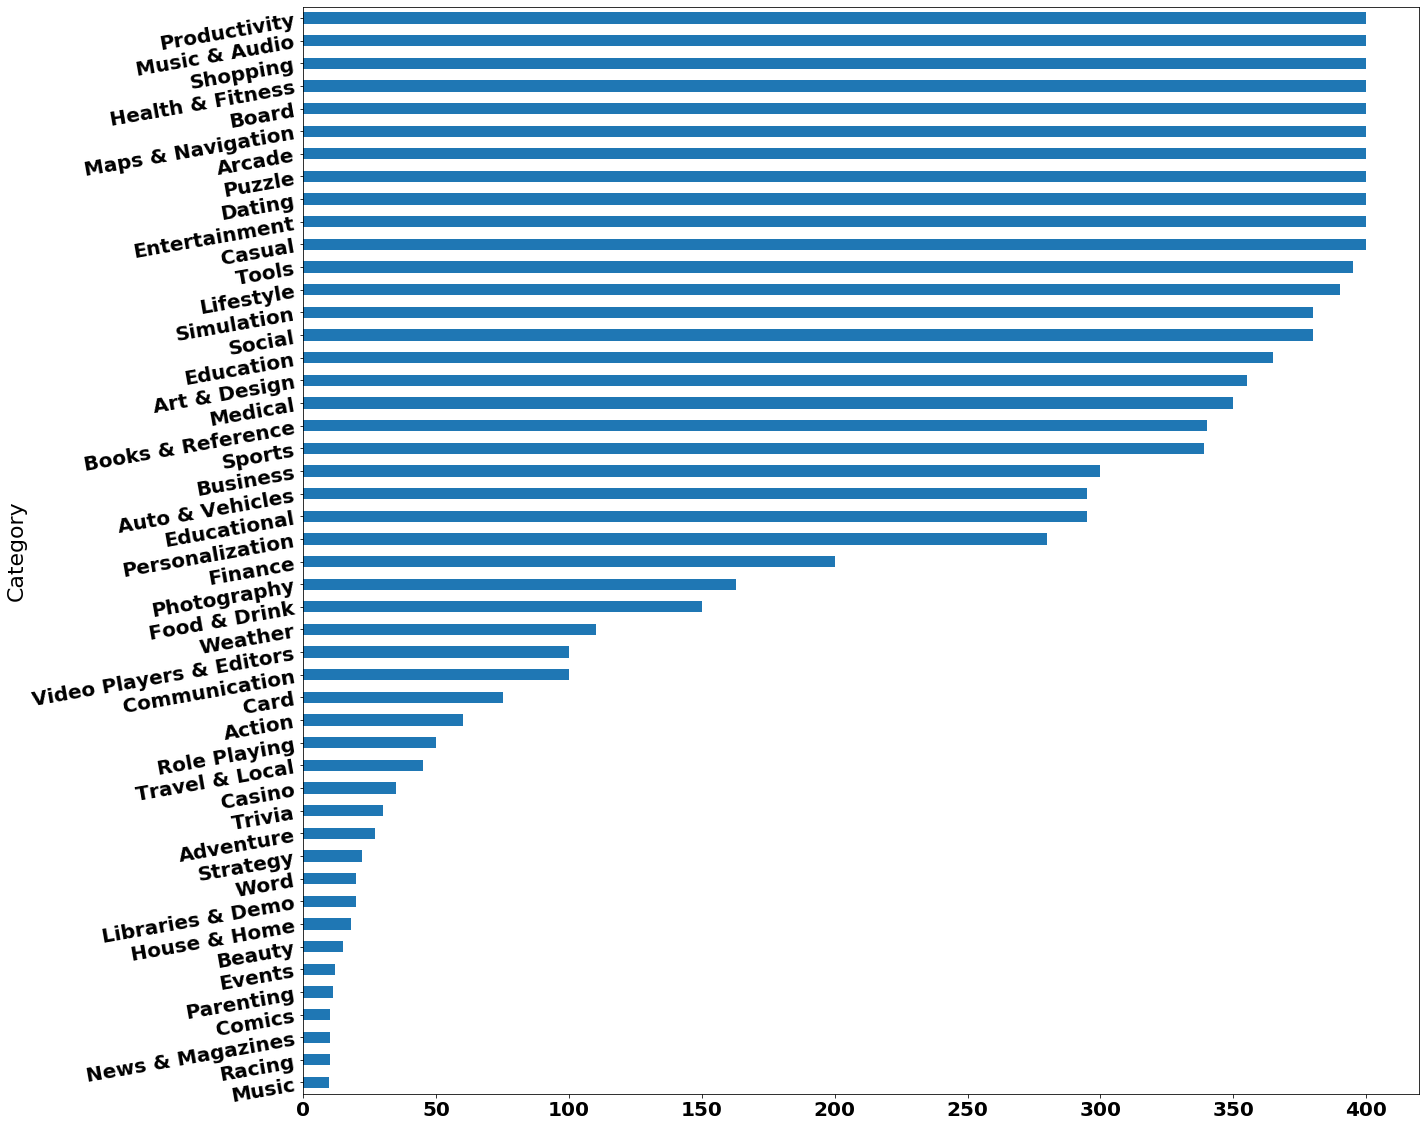

In [304]:
plt.figure(figsize=(20, 20))
df_price_cat_result.sort_values(ascending = True).plot(kind="barh",rot=10,fontsize=20)

In [23]:
df_Cat_Price = df_price_cat.groupby(['Category'])['Price'].transform(max) == df_price_cat['Price']

### Дорогие приложения по категориям

In [316]:
df_price_cat[df_Cat_Price][['App Name', 'Category','Price']].sort_values(by=['Category','Price'], ascending = [True,False])

,App Name,Category,Price
703985,INFESTED OLD - Horror Game,Action,59.99
387376,CHAOS;CHILD,Adventure,26.99
644212,Challenge Impossible Ball for you,Arcade,399.99
1580432,Baby Nightmares,Arcade,399.99
1637296,10.000 Moving Cities – Same but Different,Art & Design,354.99
1230669,REPUVE y mas... PRO,Auto & Vehicles,294.99
1207205,Golden Ratio Face - Beauty Analysis & Beauty Tips,Beauty,14.99
1399820,Most expensive word game,Board,399.99
1204038,研究社 英語大辞典セット,Books & Reference,339.99
1499476,BacaNotes,Business,299.99


### Список категорий без отзывов

In [25]:
df_rating_zero = df.Category[df['Rating Count'] == 0.0].value_counts()

In [325]:
# где Rating Count = 0 или NAN 
df_rating_zero = df.Category[(df['Rating Count'].isnull()) | (df['Rating Count'] == 0.0)].value_counts()

In [319]:
df_rating_zero.sort_values(ascending = False)

Education                  112832
Business                    93272
Music & Audio               74723
Lifestyle                   63106
Tools                       58938
Entertainment               54701
Food & Drink                51038
Health & Fitness            50128
Books & Reference           49689
Shopping                    42442
Productivity                41941
Travel & Local              35544
Personalization             31399
Finance                     26447
Communication               23512
Arcade                      23477
Casual                      21844
Sports                      20690
Social                      19491
Puzzle                      19229
Medical                     17630
News & Magazines            17301
Photography                 12707
Maps & Navigation           11685
Art & Design                 9515
Action                       9442
Events                       9082
Educational                  8897
House & Home                 8827
Auto & Vehicle

In [476]:
#df.Category.value_counts()
#df_rating_zero
print("{0:g}%".format((112832/241090)*100))
df.Category.value_counts()['Education']
df_rating_zero
percent_cat = [[cat, "{0:g}%".format(round((df_rating_zero[cat] / df.Category.value_counts()[cat]) * 100,1))]
                                     for cat in df.Category.unique()]
percent_cat

46.8008%


[['Adventure', '32.2%'],
 ['Tools', '40.9%'],
 ['Productivity', '52.6%'],
 ['Communication', '48.8%'],
 ['Social', '43.6%'],
 ['Libraries & Demo', '50.1%'],
 ['Lifestyle', '53.3%'],
 ['Personalization', '35.2%'],
 ['Racing', '27.2%'],
 ['Maps & Navigation', '43.7%'],
 ['Travel & Local', '52.8%'],
 ['Food & Drink', '69%'],
 ['Books & Reference', '42.6%'],
 ['Medical', '55%'],
 ['Puzzle', '37.6%'],
 ['Entertainment', '39.6%'],
 ['Arcade', '43.6%'],
 ['Auto & Vehicles', '48.3%'],
 ['Photography', '35.7%'],
 ['Health & Fitness', '60%'],
 ['Education', '46.8%'],
 ['Shopping', '56.4%'],
 ['Board', '32.5%'],
 ['Music & Audio', '48.2%'],
 ['Sports', '43.6%'],
 ['Beauty', '64.9%'],
 ['Business', '64.9%'],
 ['Educational', '41.8%'],
 ['Finance', '40.4%'],
 ['News & Magazines', '40.4%'],
 ['Casual', '43%'],
 ['Art & Design', '51.3%'],
 ['House & Home', '61.4%'],
 ['Card', '24.7%'],
 ['Events', '70.7%'],
 ['Trivia', '38.9%'],
 ['Weather', '25.1%'],
 ['Strategy', '30%'],
 ['Word', '32.1%'],
 ['Vide

In [494]:
dr1 =  pd.DataFrame(percent_cat, columns=['category', 'percent'])

In [492]:
#Процент приложений без отзывов
dr1.sort_values(by='percent',ascending = False)

,percent
category,
Events,70.7%
Food & Drink,69%
Beauty,64.9%
Business,64.9%
House & Home,61.4%
Health & Fitness,60%
Shopping,56.4%
Medical,55%
Lifestyle,53.3%


In [28]:
 import matplotlib.pyplot as plt

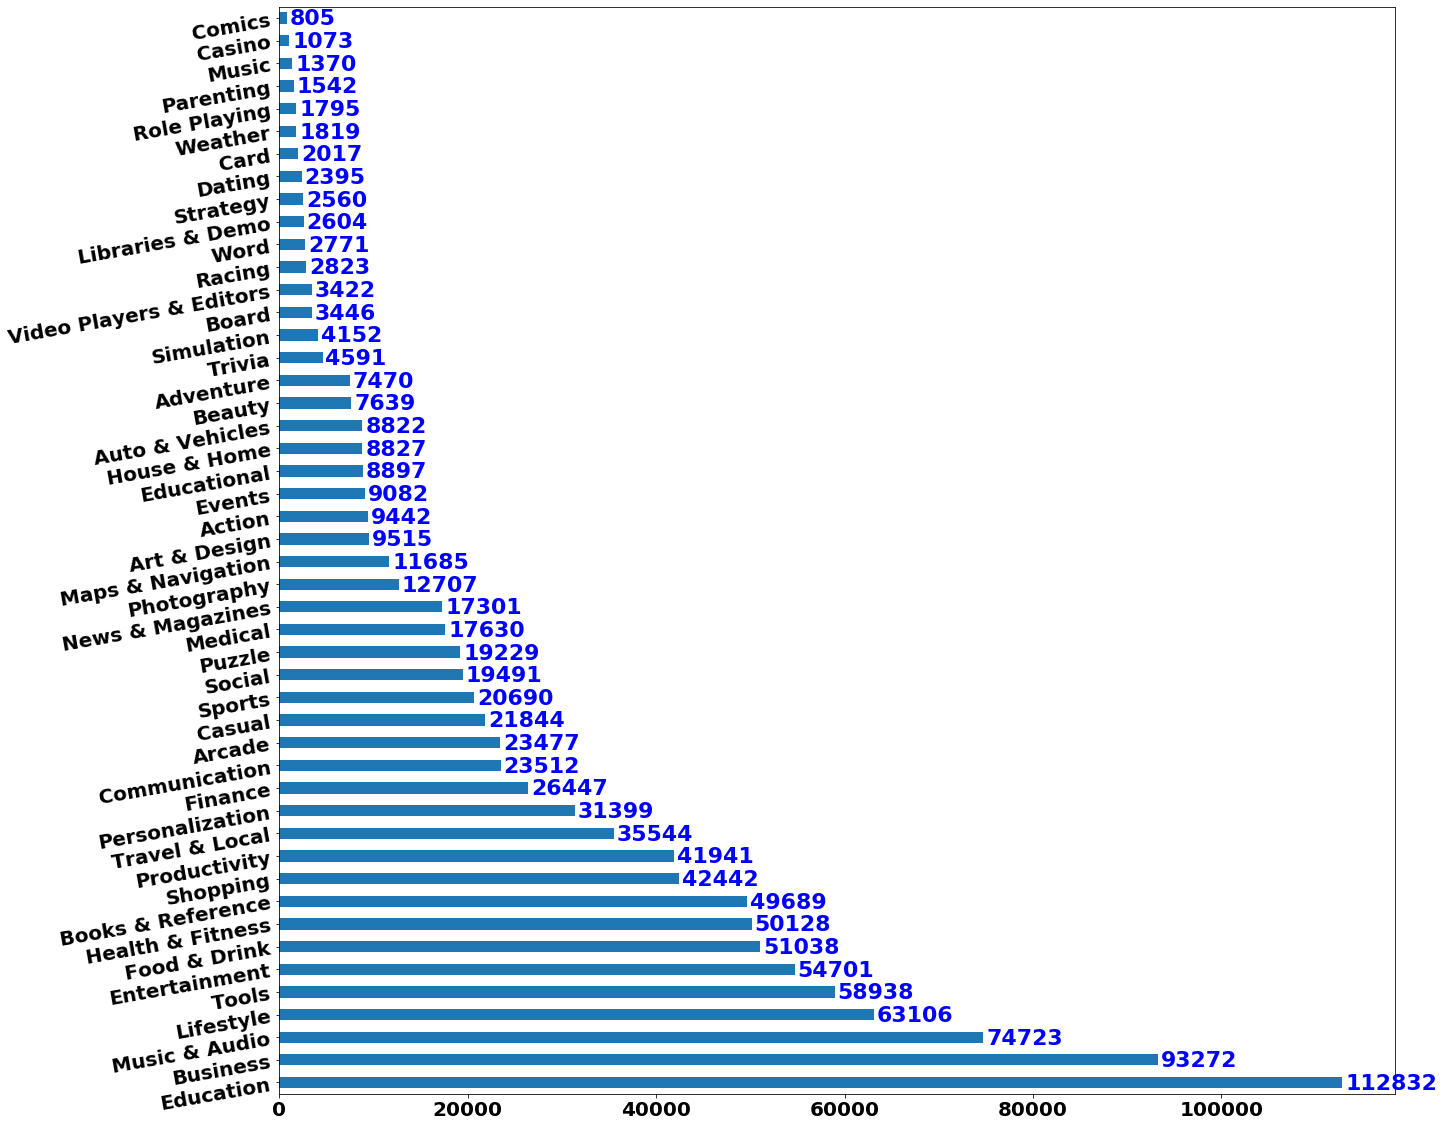

In [347]:
plt.figure(figsize=(20, 20))
top = df_rating_zero.sort_values(ascending = False)
top.plot(kind="barh", rot=10,fontsize=20)
for i, v in enumerate(top):
    plt.text(v+300, i-0.30 , str(v), color='blue')
    

In [30]:
# Форматируем дату "Mar 4, 2021" на "2021"
df_time = pd.DatetimeIndex(df['Released']).year

### Кол-во выпущенных приложений по годам


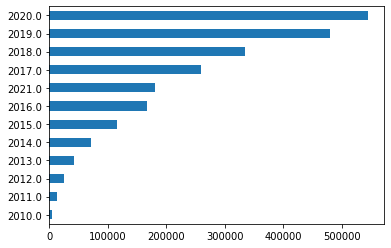

In [31]:
df_time.value_counts(ascending=True).plot(kind='barh')

In [32]:
df_duble = df.copy(deep=True)

In [33]:
df_duble['year'] = pd.DatetimeIndex(df_duble['Released']).year

In [76]:
#группируем по категориям и годам, приложения которые хоть раз скачивались
df_category_year = df_duble[df_duble['Maximum Installs'] > 0].groupby(['Category'])['year'].value_counts(ascending=True)

### Количество приложений по годам в разных категориях

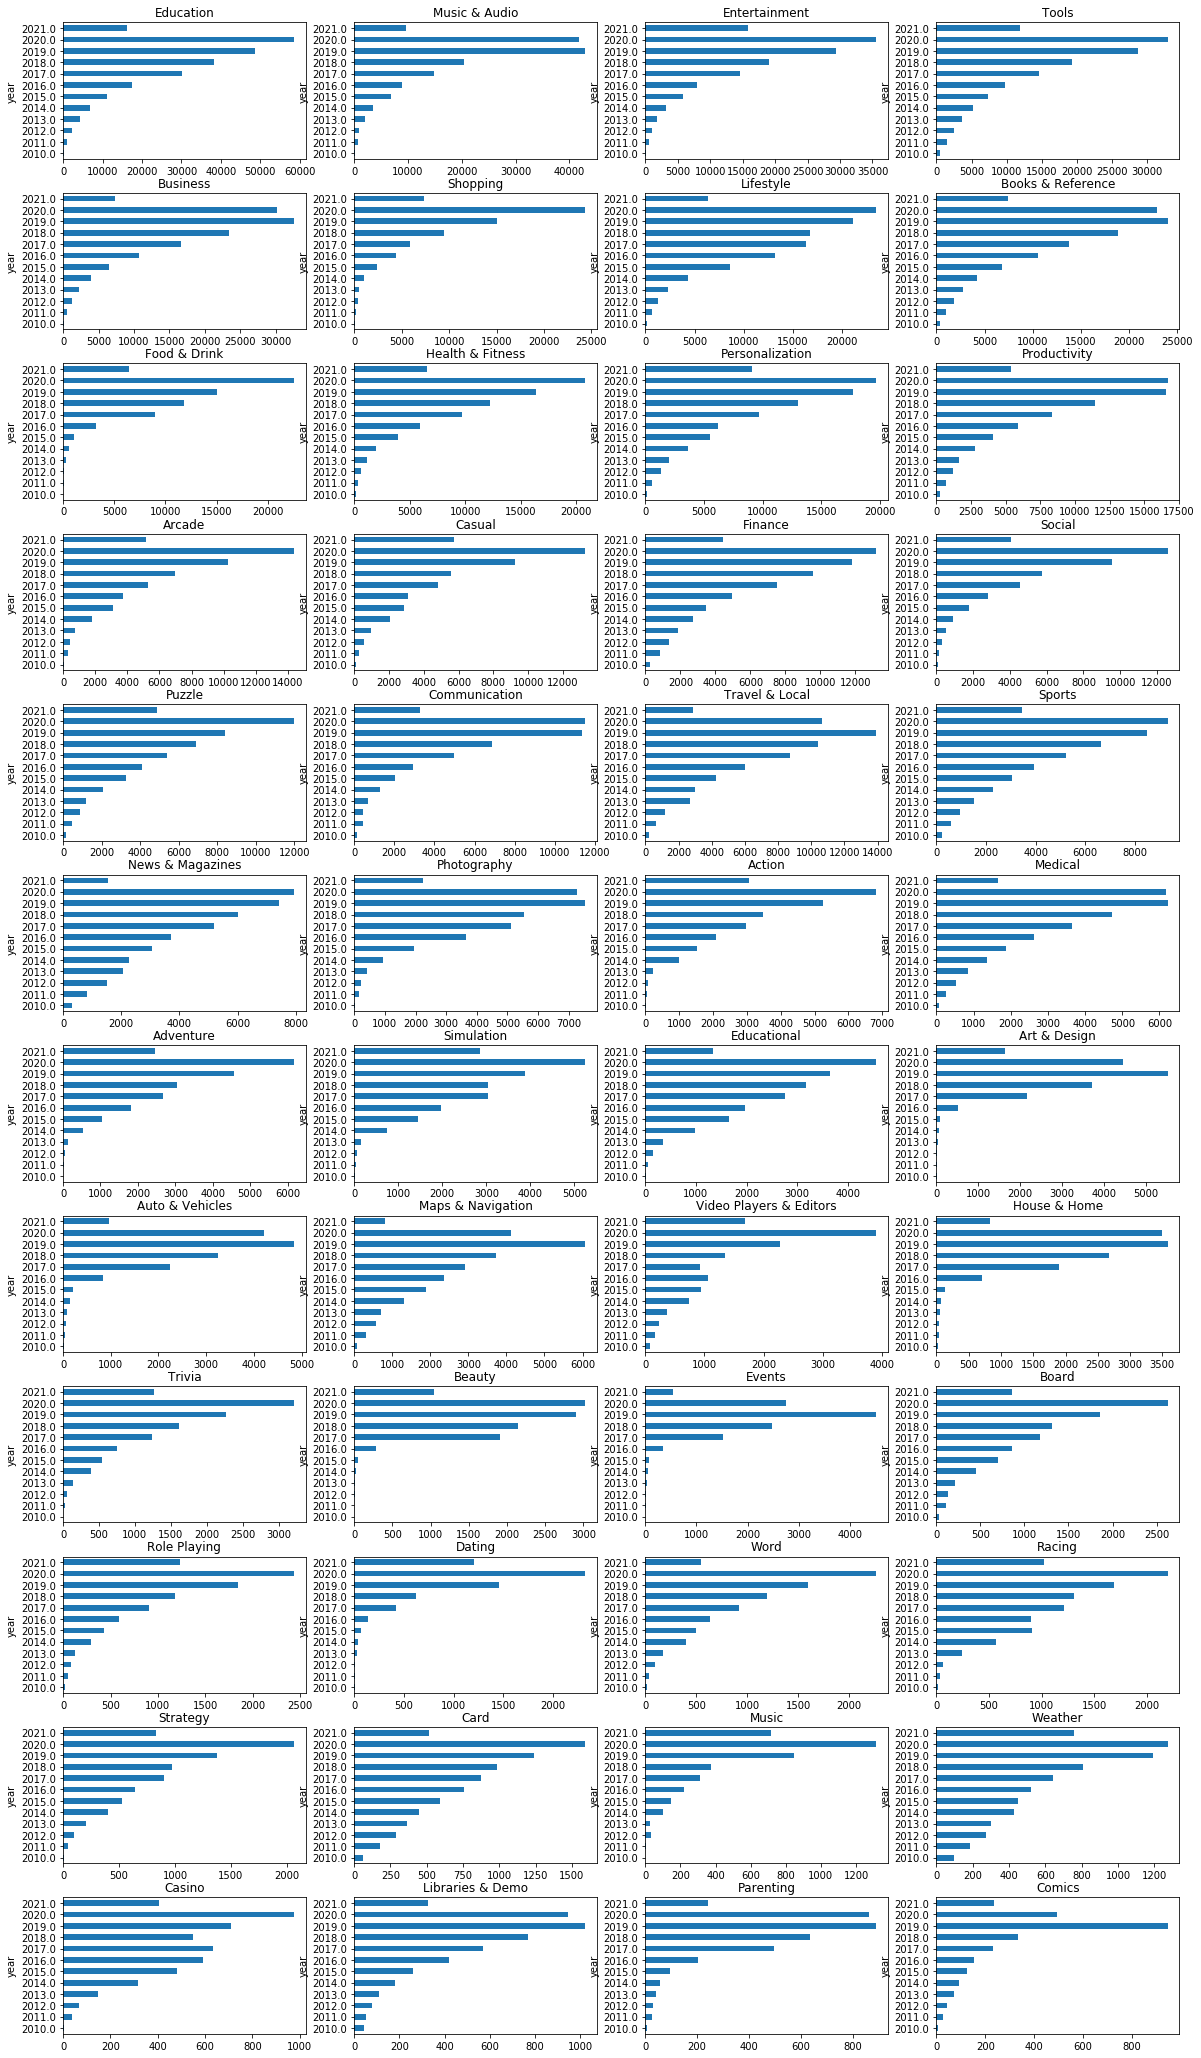

In [111]:
fig, axs = plt.subplots(12, 4, figsize = (20,37))
plt.subplots_adjust(hspace=0.25)
total_axes = 0 # строка
subplt = 0 # столбец
for x in df_category_year.unstack().sort_values(by=2020.0,ascending = False).index:
    df_category_year.unstack().loc[x].plot(kind='barh', title = x, ax = axs[total_axes,subplt])
    subplt+=1
    if subplt == 4:
        subplt=0
        total_axes +=1 

### Вывод


Если смотреть по графику "Кол-во выпущенных приложений по годам" количетсво приложений выпущенных в год только растет.
